<a href="https://colab.research.google.com/github/ClaudioAMF1/Machine-Learning/blob/main/ML_Atividade04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.ensemble import IsolationForest, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Carregando o Dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url, delimiter = ',', decimal = '.')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


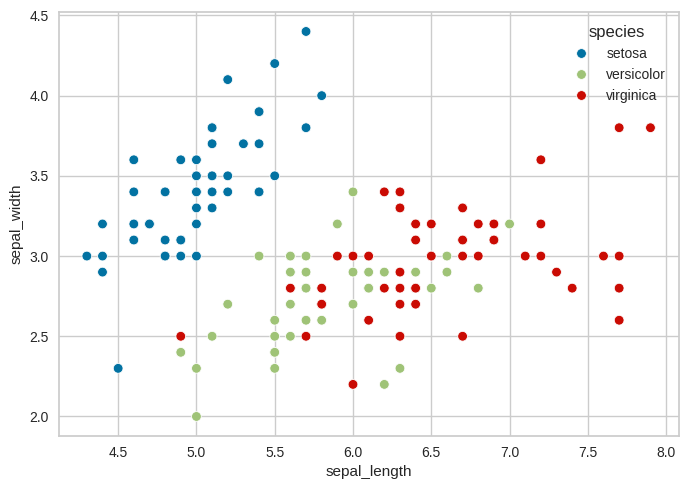

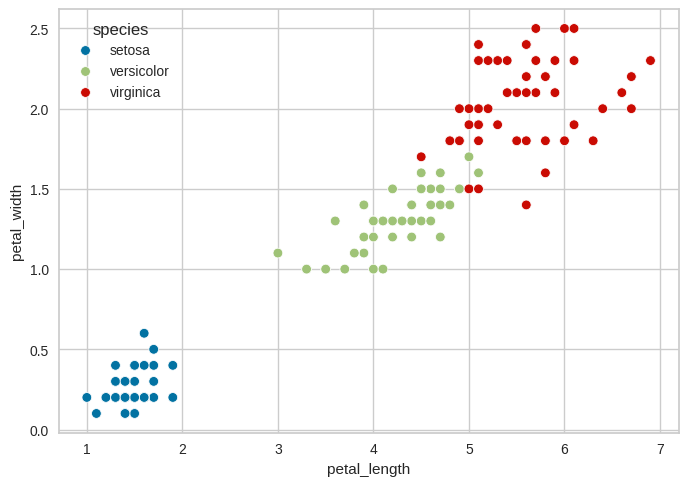

In [ ]:
# Importe as bibliotecas necessárias.
import seaborn as sns
import matplotlib.pyplot as plt

# Crie o gráfico de dispersão.
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.show()

In [ ]:
print(df['species'].value_counts(normalize=True) * 100)

species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: proportion, dtype: float64


In [ ]:
d = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species'] = df['species'].map(d)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Método do Cotovelo (k-Elbow)
no_clusters=[]
j=[]

for i in range(1,10):
    model=KMeans(n_clusters=i, n_init=1)
    model.fit(df)
    no_clusters.append(i)
    j.append(model.inertia_)

In [ ]:
pd.DataFrame(no_clusters,j)

,0
781.370600,1
179.053583,2
87.220628,3
66.900884,4
50.397857,5
44.079923,6
35.624594,7
36.788110,8
29.781189,9


Text(0, 0.5, 'j')

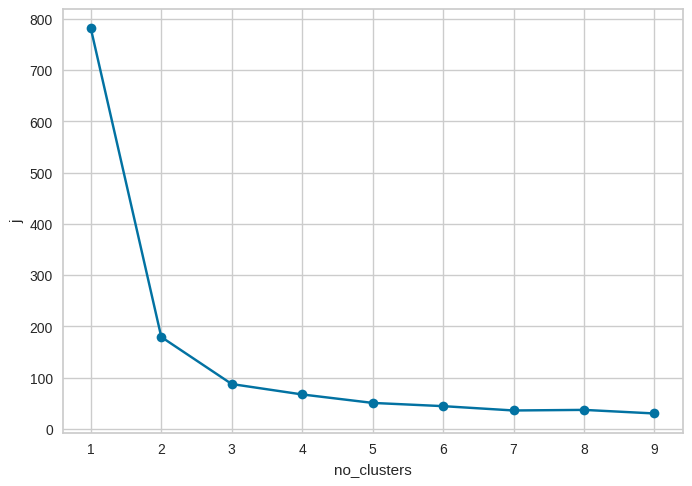

In [ ]:
plt.plot(no_clusters,j,marker='o')
plt.xlabel('no_clusters')
plt.ylabel('j')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Aplicando o K-means
model=KMeans(n_clusters=3, n_init=10)
model.fit(df)
pre=model.predict(df)

In [ ]:
df['KMeans']=pre

In [ ]:
group1=df[df['KMeans']==0]
group2=df[df['KMeans']==1]
group3=df[df['KMeans']==2]

In [ ]:
df = df.drop('KMeans', axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'petal_length')

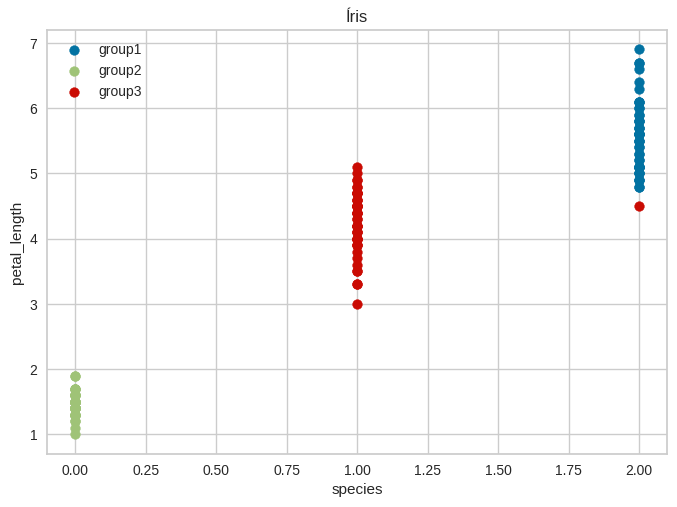

In [ ]:
plt.scatter(group1['species'],group1['petal_length'],label='group1')
plt.scatter(group2['species'],group2['petal_length'],label='group2')
plt.scatter(group3['species'],group3['petal_length'],label='group3')

plt.legend()
plt.title('Íris')
plt.xlabel('species')
plt.ylabel('petal_length')

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [ ]:
modelo = ExtraTreesClassifier();
modelo.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.9811320754716981


In [ ]:
y_pred = modelo.predict(x_test)
y_pred_rounded = np.round(y_pred)

precisao = precision_score(y_test, y_pred_rounded, average = 'macro')
recall = recall_score(y_test, y_pred_rounded, average = 'macro')
f1 = f1_score(y_test, y_pred_rounded, average = 'macro')

print("Precisão:", precisao)
print("Recall:", recall)
print("F1-score:", f1)

Precisão: 0.9803921568627452
Recall: 0.9761904761904763
F1-score: 0.9775533108866442


In [ ]:
"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred_rounded)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[23  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [ ]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred_rounded))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        16

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



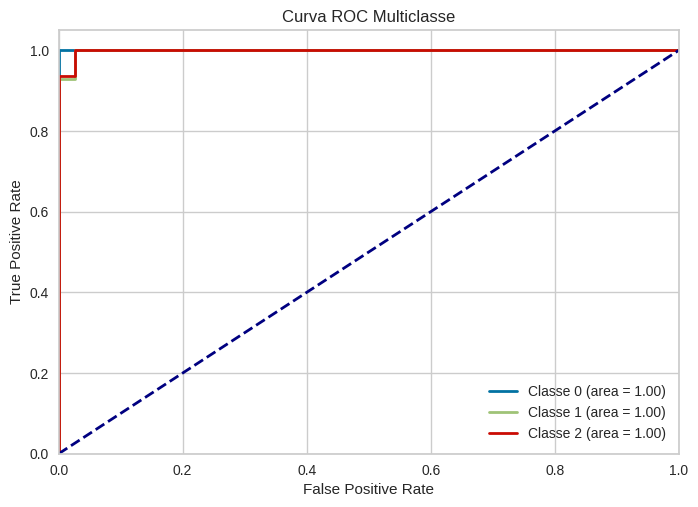

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Supomos que 'y_test' tenha as classes reais e 'modelo' seja o seu modelo treinado.
# Binarizar as classes (multiclasse -> binário)
classes = np.unique(y_test)  # Exemplo: array([0, 1, 2] para 3 classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Prever as probabilidades para cada classe
y_probs = modelo.predict_proba(x_test)

# Plotar as curvas ROC para cada classe
plt.figure()
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])  # ROC para cada classe
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC para a classe 'i'
    plt.plot(fpr, tpr, lw=2, label='Classe %d (area = %0.2f)' % (classes[i], roc_auc))

# Linha diagonal (referência para random guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()